This file splits the audio files in the Stanford dataset which contains many different sentences to chunks where each audio file has approximately one sentence and a combination of these individual sentences. It places these chunks in train/test/validaiton set with ratios approximately 70-15-15%. 

Import all the necessary packages.

In [1]:
#!pip3 install pydub
import pydub

C:\Users\eevar\.conda\envs\cs230_proj\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import IPython
import pickle

In [3]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.effects import normalize
from pydub.playback import play

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from PIL import Image
import imageio

Listen to an example file

In [6]:
IPython.display.Audio("C:\\Users\\eevar\\Desktop\\CS230\\project\\SU dataset\\Audio Files\\LA9016_ENSS.wav")

Find all the files names that contain the audios and put the file names in a list

In [10]:
from os import listdir
from os.path import isfile, join
all_files = [f for f in listdir('C:\\Users\\eevar\\Desktop\\CS230\\project\\SU dataset\\Audio Files') if isfile(join('C:\\Users\\eevar\\Desktop\\CS230\\project\\SU dataset\\Audio Files', f))]

We should have 296 files

In [12]:
print(len(all_files))

296


Define a Python dictionary that contains the file names as keys and lists that contains all the chunks corresponding that sound file as values. The lists contain the raw chunks and the combined chunks for the corresponding audio file. Here we combine 10 random chunks 5 times.

In [ ]:
import random

base = 'C:\\Users\\eevar\\Desktop\\CS230\\project\\SU dataset\\Audio Files\\'
chunk_dict = {}

combine_times = 5

for i in range(len(all_files)):
    sound = AudioSegment.from_wav(base + all_files[i])
    sound = normalize(sound)
    
    chunks = split_on_silence(sound, min_silence_len=int(300), silence_thresh=-32)
    start_len = len(chunks)
    if start_len > 1:
        for k in range(combine_times):
            randnum1 = random.randint(0, start_len-1)
            randnum2 = random.randint(0, start_len-1)
            while randnum1 == randnum2:
                randnum2 = random.randint(0, start_len-1)
            chunks.append(chunks[randnum1] + chunks[randnum2])
        chunk_dict[all_files[i]] = chunks

Dump the dictionary obtained in the previous cell. 

In [19]:
with open('./chunk_dict.json', 'wb') as fp:
    pickle.dump(chunk_dict, fp)

In [20]:
with open('./chunk_dict.json', 'rb') as su:
    chunk_dict = pickle.load(su)

In [21]:
print(len(chunk_dict))

296


Load the information about the dataset

In [23]:
import pickle as p

path_to_protocol = './pandas_audio_labels.pkl'

with open(path_to_protocol, "rb") as fh:
    stanford = p.load(fh)

In [24]:
stanford

,File_Name,fs,Amp_number,Total_time,amp,GRBAS_Average,GRBAS_Category
0,LA9013_ENSS,44100.0,1422825.0,32.263605,"[-2, -9, -2, -4, 6, -2, 7, 2, -3, 5, -4, -2, 4...",0.500000,Normal
1,LA9012_ENSS,44100.0,1503889.0,34.101791,"[-9, -12, -10, -1, -6, -8, -9, -2, -4, -10, -6...",0.500000,Normal
2,PT023ENSS,25000.0,538537.0,21.541480,"[0, 0, 0, 0, 1, -2, 2, -2, 2, -1, 1, -2, 2, -2...",0.333333,Normal
3,PT033ENSS,25000.0,442877.0,17.715080,"[-1, 2, -2, 1, 0, -1, 2, -2, 1, -1, 1, 1, -2, ...",0.500000,Normal
4,Sj30006_E_NSS,44100.0,1160192.0,26.308209,"[-5, -5, 0, -3, 1, -3, 2, -3, -1, -1, 1, -2, 3...",0.875000,Mild
...,...,...,...,...,...,...,...
291,LA8002_ENSS,44100.0,1913185.0,43.382880,"[7, -2, 10, 2, 11, 0, 14, 7, 2, 1, 4, 5, 7, -1...",0.833333,Mild
292,Sj4008_ENSS,44100.0,1115557.0,25.296077,"[0, 0, 1, -2, 2, -1, 0, 1, -1, 1, -1, 1, -1, 1...",0.625000,Mild
293,sj4009_ENSS,44100.0,1273049.0,28.867324,"[0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 2, -3, 4, -4, ...",0.625000,Mild
294,PT111_ENSS,25000.0,413427.0,16.537080,"[-1, 3, -4, 5, -5, 3, -1, 0, 1, -1, 1, -2, 3, ...",0.166667,Normal


In [25]:
def find_spectrum(amps):
    """
    Input: Audio values as numpy array.
    
    Output: The spectogram as an image of shape (224,224,3) of the audio file
    """
    amps = amps.flatten()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_axis_off()
    ax.specgram(amps, Fs=2)
    fig.savefig("test.png", bbox_inches='tight', pad_inches=0)
    img = Image.open("test.png")
    il = img.resize((224, 224))
    plt.close('all')
    image_array = np.array(il)
    image_array = image_array[:,:,:-1]
    return image_array
    

In [26]:
def find_status(GRBAS_Category):
    "Return 0 if the patient has healthy voice and 1 if the patient has voice disorder"
    GRBAS_Category = str(GRBAS_Category)
    if (GRBAS_Category == "Normal"):
        return 0
    else:
        return 1

In [30]:
count = 0
normal_count = 0
for index, rows in stanford.iterrows():
    status = find_status(rows.GRBAS_Category)
    count += 1 
    if status == 0:
        normal_count += 1

print('The ratio of heatlhy patients is', round(normal_count/count,2))
print('The ratio of patients with voice disorder is', round(1-normal_count/count,2))    

The ratio of heatlhy patients is 0.39
The ratio of patients with voice disorder is 0.61


Go through the stanford dataset and replace the patients' spectogram and information about their condition randomly in train/validation/test sets. Observe that one patient is only in one of clusters (either train, validation or test).

In [32]:
train_set =[]
val_set = []
test_set = []

# For checking whether the patients are being mixed or not. 
train_files = []
test_files = []
val_files = []

for index, rows in stanford.iterrows():
    file_name = rows.File_Name
    status = find_status(rows.GRBAS_Category)
    decider = random.uniform(0, 1)
    if decider > 0.3:
        chunks = chunk_dict[file_name + '.wav']
        train_files.append(file_name)
        for i in range(len(chunks)):
            samples = np.array(chunks[i].get_array_of_samples())
            spectogram = find_spectrum(samples)
            Dict = {"spectogram": spectogram, "status": status, "patient": file_name}
            train_set.append(Dict)
              
    elif 0.3 > decider > 0.15:
        chunks = chunk_dict[file_name + '.wav']
        test_files.append(file_name)
        for i in range(len(chunks)):
            samples = np.array(chunks[i].get_array_of_samples())
            spectogram = find_spectrum(samples)
            Dict = {"spectogram": spectogram, "status": status, "patient": file_name}
            test_set.append(Dict)

        
    else:
        chunks = chunk_dict[file_name + '.wav']
        val_files.append(file_name)
        for i in range(len(chunks)):
            samples = np.array(chunks[i].get_array_of_samples())
            spectogram = find_spectrum(samples)
            Dict = {"spectogram": spectogram, "status": status, "patient": file_name}
            val_set.append(Dict) 
        

Test whether the spectograms look correct or not. 

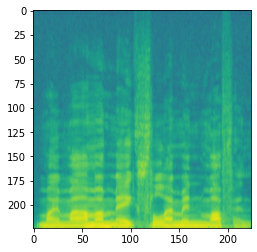

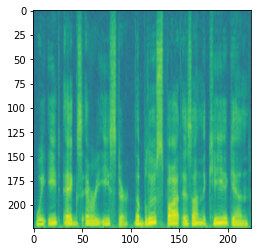

In [33]:
image = train_set[1000]['spectogram']
plt.imshow(image)
plt.show()

image = test_set[425]['spectogram']
plt.imshow(image)
plt.show()

In [34]:
print(len(train_set))
print(len(test_set))
print(len(val_set))


2685
724
790


In [35]:
for test_name in test_files:
    if (test_name in train_files):
        print('A patient that is in the test set is also in the train set')
    if (test_name in val_files):
        print('A patient that is in the test set is also in the validation set')

Dump the lists

In [100]:
import pickle

with open('./train_set.json', 'wb') as fp:
    pickle.dump(train_set, fp)

with open('./test_set', 'wb') as fp:
    pickle.dump(test_set, fp)

with open('./val_set', 'wb') as fp:
    pickle.dump(val_set, fp)

